In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
sns.set_style("white")

df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
(537577, 12)
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


#### Categorical data:
>- User ID
- Product ID
- Gender
- Occupation
- City Category
- Marital Status
- Product Category 1
- Product Category 2
- Product Category 3
    
#### Continuous data: 
>- Age
- Stay in current city (years)
- Purchase

In [8]:
df['Age'] = df['Age'].replace('0-17', 0)
df['Age'] = df['Age'].replace('18-25', 1)
df['Age'] = df['Age'].replace('26-35', 2)
df['Age'] = df['Age'].replace('36-45', 3)
df['Age'] = df['Age'].replace('46-50', 4)
df['Age'] = df['Age'].replace('51-55', 5)
df['Age'] = df['Age'].replace('55+', 6)

df['Age'] = df['Age'].astype('int64')

In [10]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(lambda x: x.lstrip('+').rstrip('+'))

In [11]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [4]:
print(df['Product_Category_1'].isnull().sum())
print(df['Product_Category_2'].isnull().sum())
print(df['Product_Category_3'].isnull().sum())

0
166986
373299


In [5]:
# replace the null values with 0 because a customer doesn't have to buy products from all three categories.
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [7]:
df[(df['Product_Category_2']>0)].sum()

User_ID                                                            371701398309
Product_ID                    P00248942P00085442P00193542P00184942P00346142P...
Gender                        FFMMMMMMFFFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMM...
Age                           0-170-1726-3546-5046-5046-5026-3526-3551-5551-...
Occupation                                                              3010452
City_Category                 AAABBBAAAAAABCCCCCCBBBBBBBBBBBBCCCCCCCCCAAAAAA...
Stay_In_Current_City_Years    22322211111114+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+...
Marital_Status                                                           150266
Product_Category_1                                                      1570147
Product_Category_2                                                  3.64741e+06
Product_Category_3                                                  2.08138e+06
Purchase                                                             3732568444
dtype: object

In [37]:
# Take a subset of the data to make plots clearer.
df_gender = df.loc[
    ((df['Gender'] == 'M') | (df['Gender'] == 'F')),
    ['Gender', 'Stay_In_Current_City_Years', 'Age', 'Product_Category_1', 'Product_Category_2', 
     'Product_Category_3', 'Purchase']
]

purchases = df.loc[
    ((df['Gender'] == 'M') | (df['Gender'] == 'F')),
    ['Gender', 'Purchase']
]

In [ ]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                            Stay_In_Current_City_Years       Age  \
Stay_In_Current_City_Years                    1.000000 -0.004754   
Age                                          -0.004754  1.000000   
Product_Category_1                           -0.004182  0.061951   
Product_Category_2                            0.001244  0.019723   
Product_Category_3                            0.001992 -0.006922   
Purchase                                      0.005470  0.017717   

                            Product_Category_1  Product_Category_2  \
Stay_In_Current_City_Years           -0.004182            0.001244   
Age                                   0.061951            0.019723   
Product_Category_1                    1.000000           -0.040730   
Product_Category_2                   -0.040730            1.000000   
Product_Category_3                   -0.389048            0.090284   
Purchase                             -0.314125            0.038395   

                            Prod

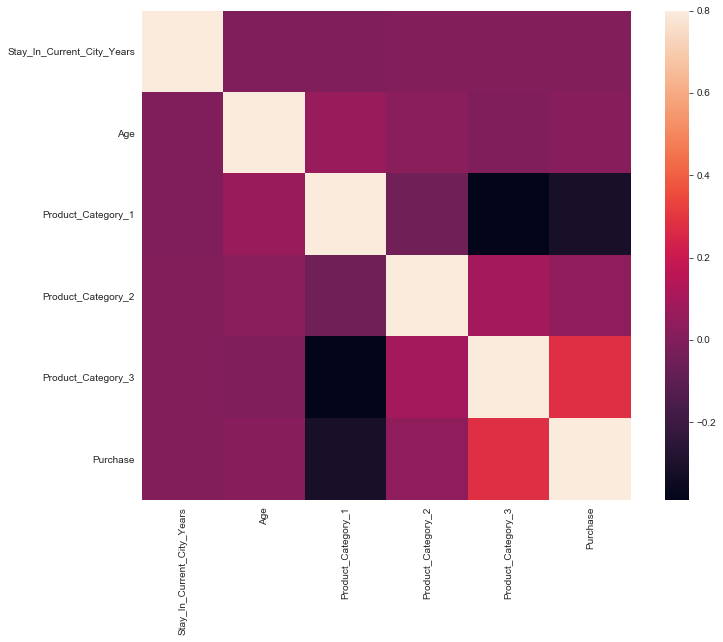

In [45]:
# Make the correlation matrix.
corrmat = df_gender.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

C:\Users\AES\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AES\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


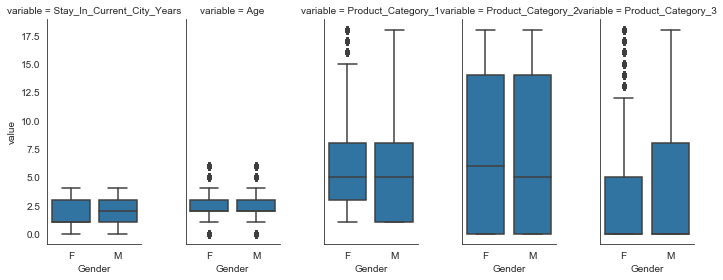

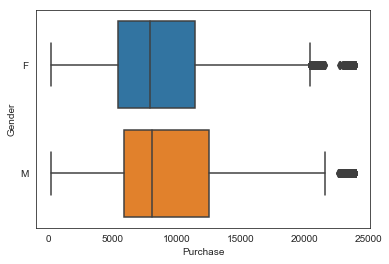

             Age                                               \
           count      mean       std  min  25%  50%  75%  max   
Gender                                                          
F       132197.0  2.505208  1.384891  0.0  2.0  2.0  3.0  6.0   
M       405380.0  2.491346  1.341864  0.0  2.0  2.0  3.0  6.0   

       Product_Category_1           ...  Purchase           \
                    count      mean ...       75%      max   
Gender                              ...                      
F                132197.0  5.595445 ...   11436.0  23959.0   
M                405380.0  5.197748 ...   12542.0  23961.0   

       Stay_In_Current_City_Years                                               
                            count      mean       std  min  25%  50%  75%  max  
Gender                                                                          
F                        132197.0  1.824693  1.254941  0.0  1.0  1.0  3.0  4.0  
M                        405380.0  1.87

In [39]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_gender[['Gender', 'Stay_In_Current_City_Years', 'Age', 'Product_Category_1', 'Product_Category_2', 
     'Product_Category_3']]
df_long = pd.melt(df_long, id_vars=['Gender'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Gender", "value")
plt.show()

ax = sns.boxplot(x=df_gender['Purchase'], y=df_gender['Gender'])
plt.show()

# Descriptive statistics by group.
print(df_gender.groupby('Gender').describe())

# Test whether group differences are significant.
for col in df_gender.loc[:,'Stay_In_Current_City_Years':'Purchase'].columns:
    print(col)
    print(stats.ttest_ind(
        df_gender[df_gender['Gender'] == 'M'][col].dropna(),
        df_gender[df_gender['Gender'] == 'F'][col].dropna()
    ))

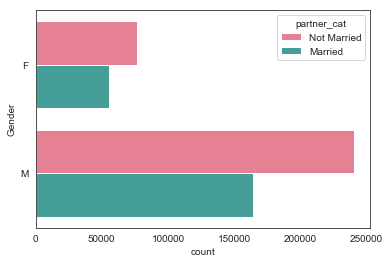

partner_cat  Married  Not Married
Gender                           
F              55223        76974
M             164537       240843
Power_divergenceResult(statistic=162247.2218175257, pvalue=0.0)


In [44]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['Gender'] == 'M') | (df['Gender'] == 'F')),
    ['Gender','Marital_Status']
]

# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['Marital_Status'] == 1, 'partner_cat'] = 'Married'
df_2cat.loc[df_2cat['Marital_Status'] == 0, 'partner_cat'] = 'Not Married'

# Plot counts for each combination of levels.
sns.countplot(y="Gender", hue="partner_cat", data=df_2cat, palette="husl")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['Gender'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))